The research topic I am working towards in this Unsupervised Learning Project is the clustering of customers based on a variety of credit card data.  I am using the "Credit Card Dataset" dataset from Kaggle located here: https://www.kaggle.com/arjunbhasin2013/ccdata

The focus of this research is to cluster customers together based on the amount of time they have been using the credit card and the other factors such as balance, purchases, cash advances, etc.  I would like to get an idea of the amount of money that is spent by people that have had their cards for different periods of time and see what the correlation between those groups are.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn import metrics
from scipy import stats
from scipy.stats import iqr
import time
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [2]:
credit_df = pd.read_csv('cc_general.csv')

# Data Exploration and Preprocessing 

In [3]:
credit_df.shape

(8950, 18)

In [4]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
credit_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
credit_df.drop(['CUST_ID'], axis=1, inplace=True)

In [7]:
credit_df.nunique()

BALANCE                             8871
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4323
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8711
MINIMUM_PAYMENTS                    8636
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

I am working with so many different values for many of these columns.  Based on this I am going to categorize the columns into different groups based on the range of their numbers.

### Missing Values

In [8]:
credit_df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
TENURE                                0
PURCHASES_FREQUENCY                   0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PRC_FULL_PAYMENT                      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
PAYMENTS                              0
BALANCE                               0
dtype: int64

Based on this it looks like the MINIMUM_PAYMENTS column is the big offender for missing values (CREDIT_LIMIT also has 1).  I could drop those values from the dataframe or use the mean to fill them in.  I don't want to lose data if I can help it so I am going to replace the missing values with the mean for that column.

In [9]:
credit_df.fillna(credit_df.mean(), inplace=True)

In [10]:
credit_df.isnull().sum().sort_values(ascending=False)

TENURE                              0
ONEOFF_PURCHASES_FREQUENCY          0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
PURCHASES_INSTALLMENTS_FREQUENCY    0
PRC_FULL_PAYMENT                    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
BALANCE                             0
dtype: int64

# Visualizations of data without dealing with outliers or dimensionality reduction

In [11]:
# I'm splitting my dataframe into X and Y here
X = credit_df.iloc[:, :-1]
y = credit_df.iloc[:, -1]

print(X.shape, y.shape)

(8950, 16) (8950,)


In [12]:
# I'm going to standardize my data here
X_std = StandardScaler().fit_transform(X)

# I'm going to use PCA to limit the number of components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

## KMeans

In [13]:
# I need to figure out the optimal number of clusters for my data
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(credit_df)
    distortions.append(kmeanModel.inertia_)

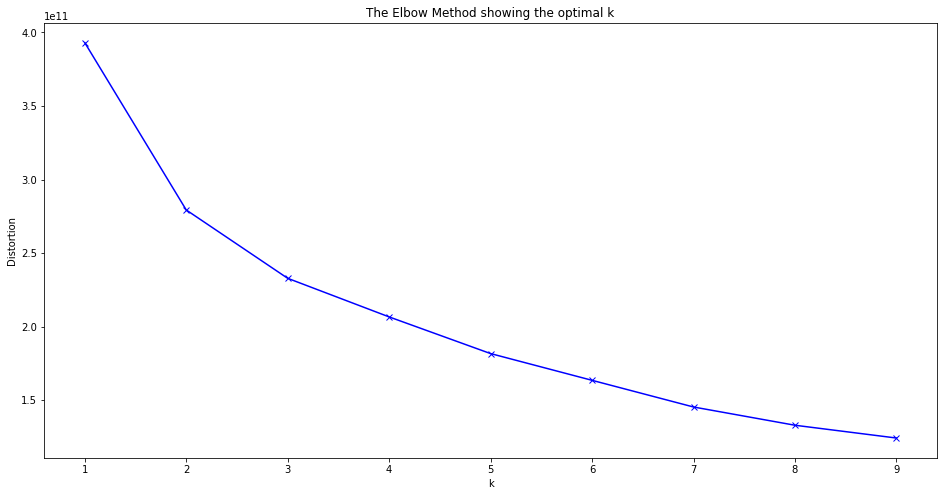

In [14]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Based on the "Elbow Method" above, the optimal number of clusters for my data is 5.  I wanted to see what different numbers looked like so I ran the model using a few different numbers so I could really see the change take place.

137 ms ± 349 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


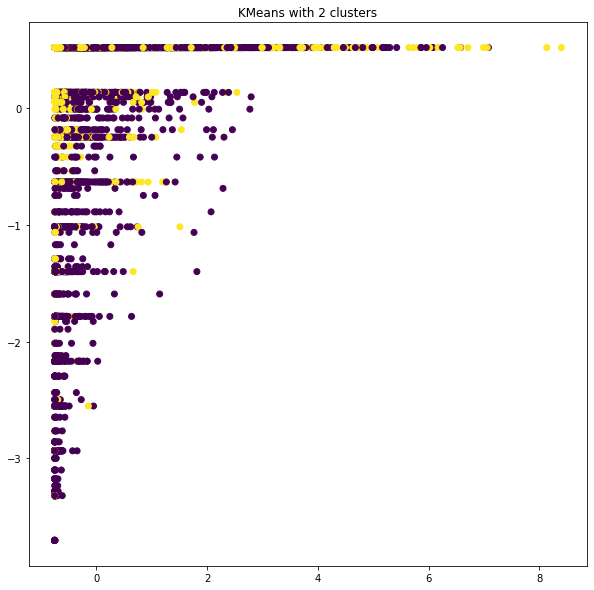

174 ms ± 396 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


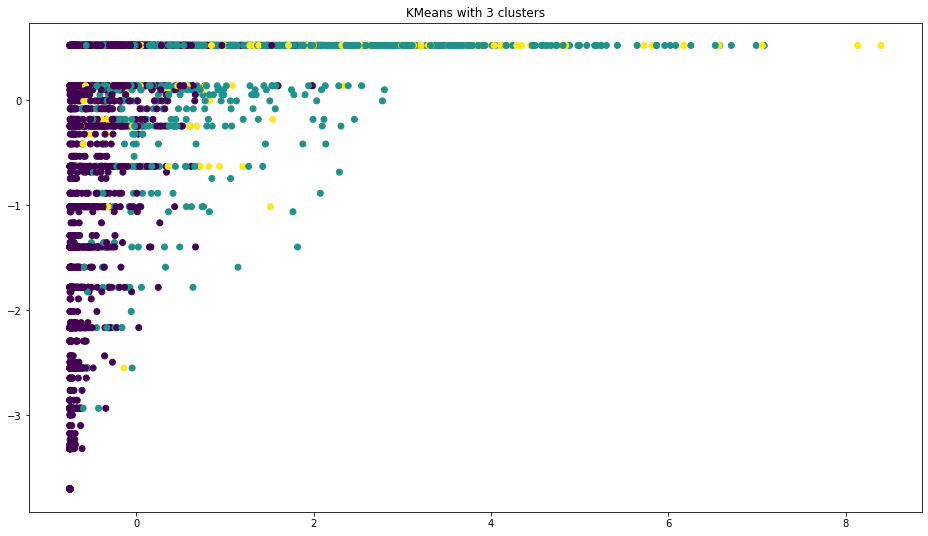

212 ms ± 680 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


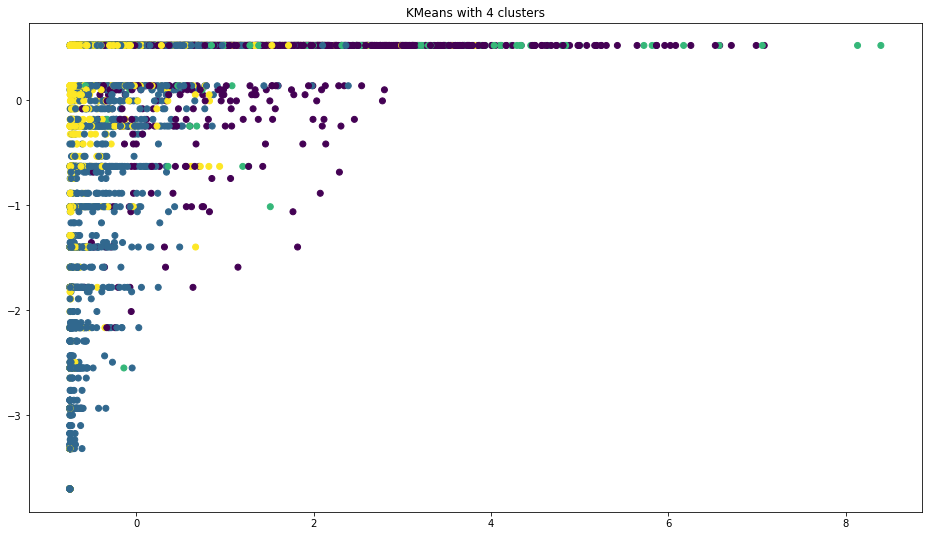

In [15]:
# KMeans with 2 clusters
k_means = KMeans(n_clusters=2, random_state=16)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.title('KMeans with 2 clusters')
plt.show()

# KMeans with 3 clusters
k_means = KMeans(n_clusters=3, random_state=16)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.rcParams["figure.figsize"] = [16,9]
plt.title('KMeans with 3 clusters')
plt.show()

# KMeans with 4 clusters
k_means = KMeans(n_clusters=4, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.title('KMeans with 4 clusters')
plt.show()



235 ms ± 569 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


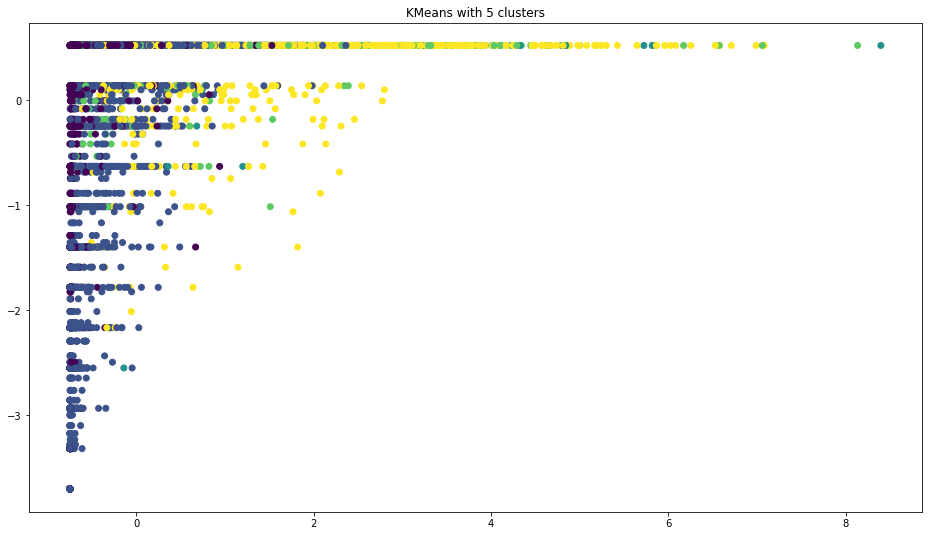

309 ms ± 1.86 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


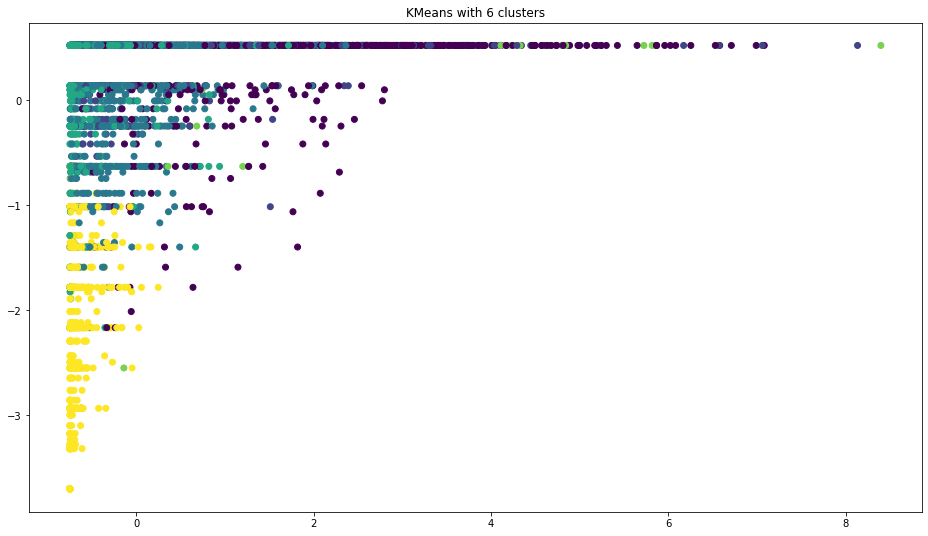

357 ms ± 2.81 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


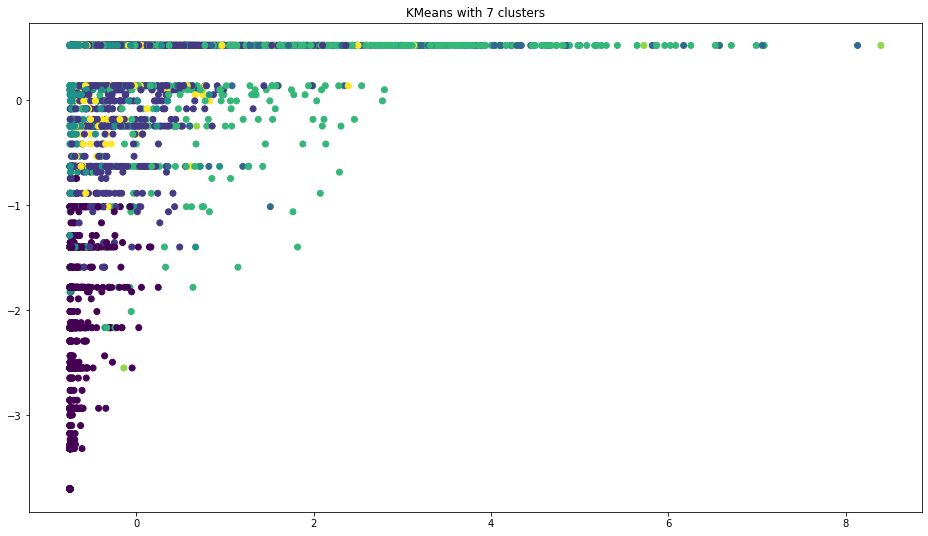

In [16]:
# KMeans with 5 clusters
k_means = KMeans(n_clusters=5, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.title('KMeans with 5 clusters')
plt.show()

# KMeans with 6 clusters
k_means = KMeans(n_clusters=6, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.title('KMeans with 6 clusters')
plt.show()

# KMeans with 7 clusters
k_means = KMeans(n_clusters=7, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.title('KMeans with 7 clusters')
plt.show()

# Dimensionality Reduction using PCA

85.7 ms ± 174 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


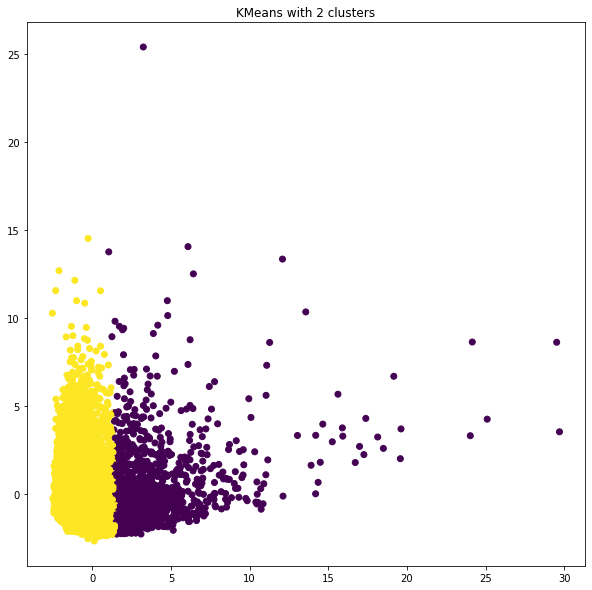

113 ms ± 550 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


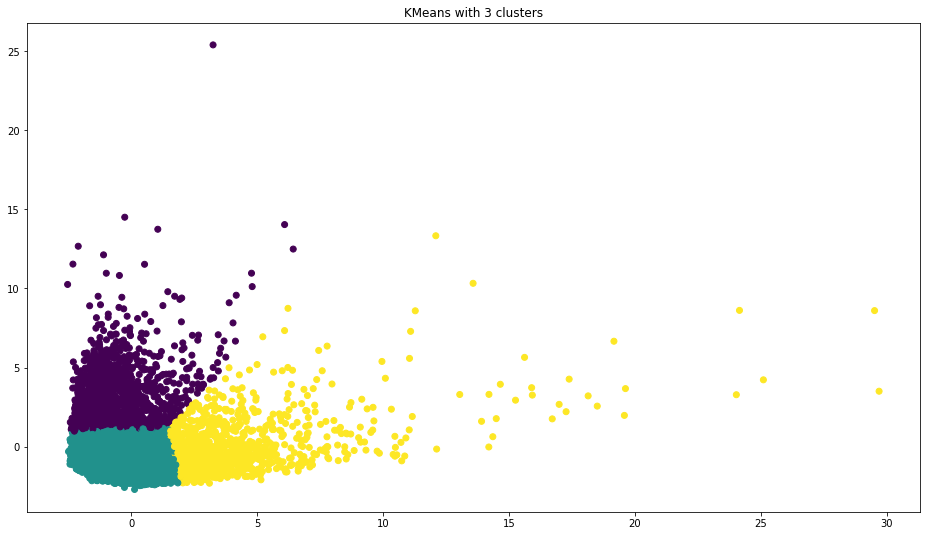

133 ms ± 93.1 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


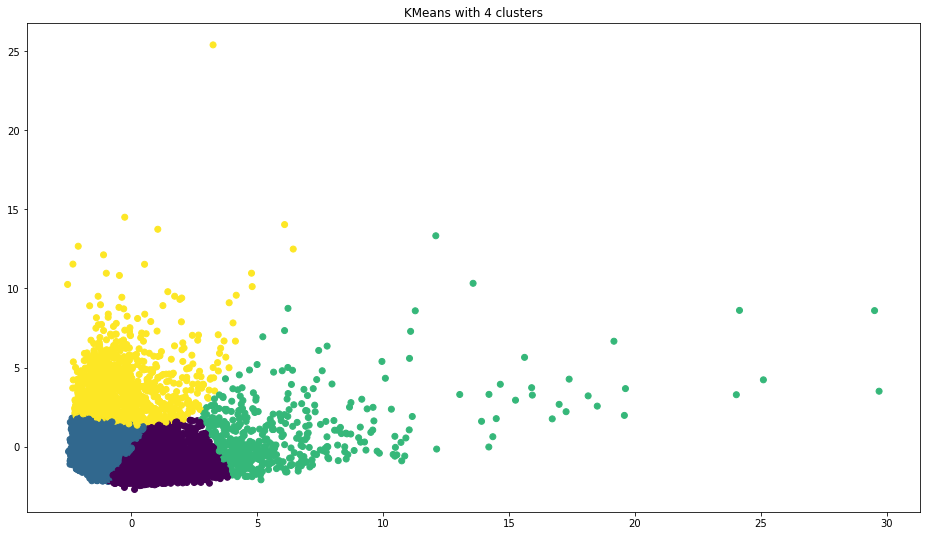

In [17]:
# KMeans with 2 clusters
k_means = KMeans(n_clusters=2, random_state=16)
%timeit k_means.fit(X_pca)
y_pred = k_means.predict(X_pca)

# I'm going to plot the solution
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.title('KMeans with 2 clusters')
plt.show()

# KMeans with 3 clusters
k_means = KMeans(n_clusters=3, random_state=16)
%timeit k_means.fit(X_pca)
y_pred = k_means.predict(X_pca)

# I'm going to plot the solution
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.rcParams["figure.figsize"] = [16,9]
plt.title('KMeans with 3 clusters')
plt.show()

# KMeans with 4 clusters
k_means = KMeans(n_clusters=4, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_pca)
y_pred = k_means.predict(X_pca)

# I'm going to plot the solution
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.title('KMeans with 4 clusters')
plt.show()


187 ms ± 318 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


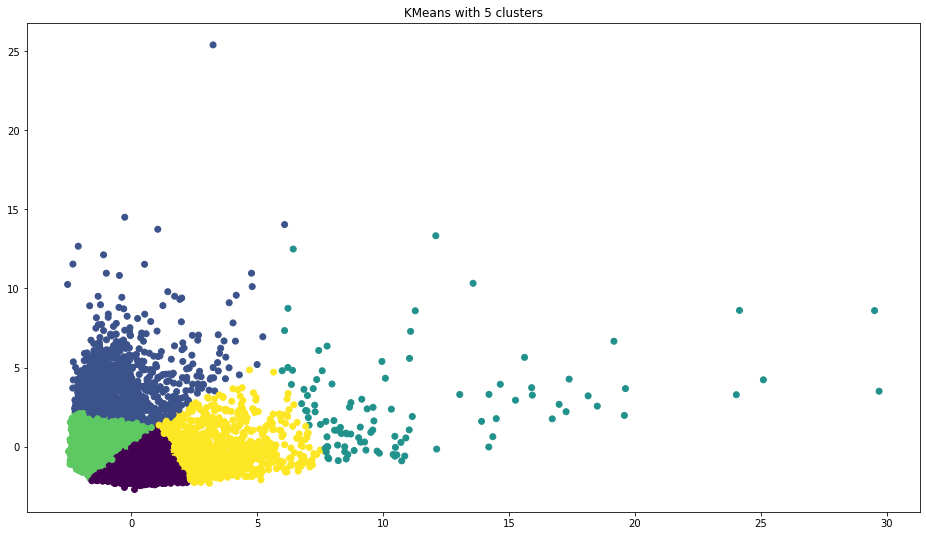

216 ms ± 218 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


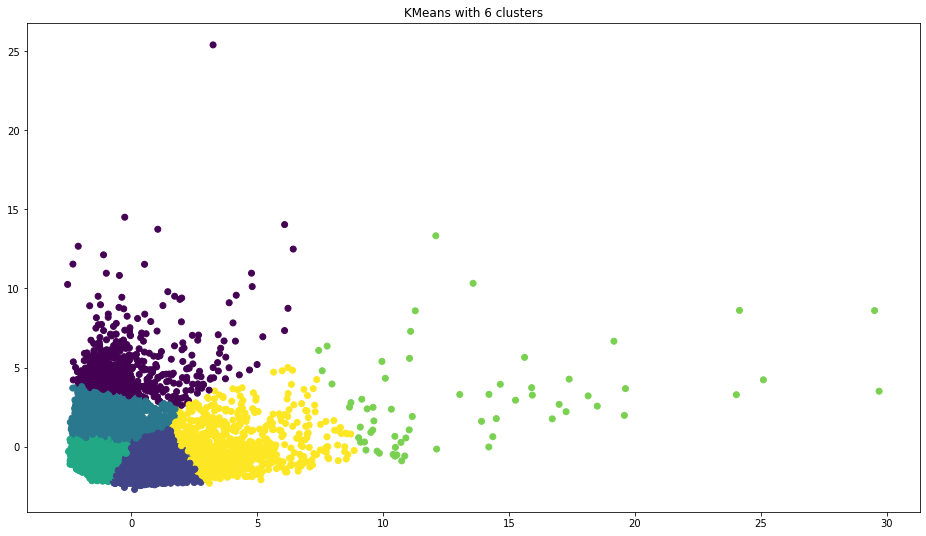

324 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


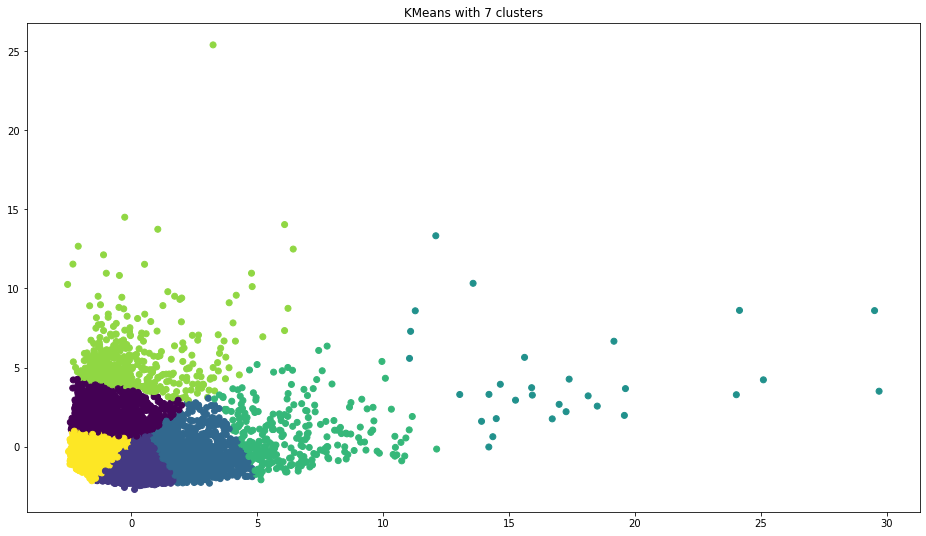

In [18]:
# KMeans with 5 clusters
k_means = KMeans(n_clusters=5, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_pca)
y_pred = k_means.predict(X_pca)

# I'm going to plot the solution
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.title('KMeans with 5 clusters')
plt.show()

# KMeans with 6 clusters
k_means = KMeans(n_clusters=6, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_pca)
y_pred = k_means.predict(X_pca)

# I'm going to plot the solution
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.title('KMeans with 6 clusters')
plt.show()

# KMeans with 7 clusters
k_means = KMeans(n_clusters=7, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_pca)
y_pred = k_means.predict(X_pca)

# I'm going to plot the solution
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.title('KMeans with 7 clusters')
plt.show()

It is very clear that using PCA for this dataset has helped me create much more distinct clusters of the data when compared to not.  The 5th cluster (dark green) covers the outliers of the dataset.  

In [19]:
# I'm going to check the ARI scores for KMeans
kmeans_pred_2 = KMeans(n_clusters=2, random_state=16).fit_predict(X_std)
kmeans_pred_3 = KMeans(n_clusters=3, random_state=16).fit_predict(X_std)
kmeans_pred_4 = KMeans(n_clusters=4, random_state=16).fit_predict(X_std)
kmeans_pred_5 = KMeans(n_clusters=5, random_state=16).fit_predict(X_std)
kmeans_pred_6 = KMeans(n_clusters=6, random_state=16).fit_predict(X_std)
kmeans_pred_7 = KMeans(n_clusters=7, random_state=16).fit_predict(X_std)

print('The ARI score for the 2 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_2)))
print('The ARI score for the 3 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_3)))
print('The ARI score for the 4 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_4)))
print('The ARI score for the 5 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_5)))
print('The ARI score for the 6 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_6)))
print('The ARI score for the 7 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_7)))

The ARI score for the 2 cluster KMeans is: -0.015655512462019794
The ARI score for the 3 cluster KMeans is: -0.026290696455096307
The ARI score for the 4 cluster KMeans is: -0.0058674754973095464
The ARI score for the 5 cluster KMeans is: -0.01537785300539523
The ARI score for the 6 cluster KMeans is: -0.0045657300877418976
The ARI score for the 7 cluster KMeans is: -0.006530369635456493


In [20]:
kmeans_pred_2 = KMeans(n_clusters=2, random_state=16).fit_predict(X_pca)
kmeans_pred_3 = KMeans(n_clusters=3, random_state=16).fit_predict(X_pca)
kmeans_pred_4 = KMeans(n_clusters=4, random_state=16).fit_predict(X_pca)
kmeans_pred_5 = KMeans(n_clusters=5, random_state=16).fit_predict(X_pca)
kmeans_pred_6 = KMeans(n_clusters=6, random_state=16).fit_predict(X_pca)
kmeans_pred_7 = KMeans(n_clusters=7, random_state=16).fit_predict(X_pca)

print('The ARI score for the 2 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_2)))
print('The ARI score for the 3 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_3)))
print('The ARI score for the 4 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_4)))
print('The ARI score for the 5 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_5)))
print('The ARI score for the 6 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_6)))
print('The ARI score for the 7 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_7)))

The ARI score for the 2 cluster KMeans (PCA) is: -0.09743004892131044
The ARI score for the 3 cluster KMeans (PCA) is: -0.02505025148503761
The ARI score for the 4 cluster KMeans (PCA) is: -0.009968728699413794
The ARI score for the 5 cluster KMeans (PCA) is: -0.01578076816929666
The ARI score for the 6 cluster KMeans (PCA) is: -0.00469272024986622
The ARI score for the 7 cluster KMeans (PCA) is: -0.011470018958040487


In [21]:
# Here are the silhouette scores for KMeans
print('The Silhouette score for the 2 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_std, kmeans_pred_2, metric='euclidean')))
print('The Silhouette score for the 3 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_std, kmeans_pred_3, metric='euclidean')))
print('The Silhouette score for the 4 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_std, kmeans_pred_4, metric='euclidean')))
print('The Silhouette score for the 5 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_5, metric='euclidean')))
print('The Silhouette score for the 6 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_6, metric='euclidean')))
print('The Silhouette score for the 7 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_7, metric='euclidean')))

The Silhouette score for the 2 cluster KMeans is: 0.33318238937215294
The Silhouette score for the 3 cluster KMeans is: 0.26099265342407113
The Silhouette score for the 4 cluster KMeans is: 0.20213125391981546
The Silhouette score for the 5 cluster KMeans is: 0.40284437966946446
The Silhouette score for the 6 cluster KMeans is: 0.3866910699466531
The Silhouette score for the 7 cluster KMeans is: 0.38577068012639276


In [22]:
# Here are the silhouette scores for KMeans
print('The Silhouette score for the 2 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_2, metric='euclidean')))
print('The Silhouette score for the 3 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_3, metric='euclidean')))
print('The Silhouette score for the 4 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_4, metric='euclidean')))
print('The Silhouette score for the 5 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_5, metric='euclidean')))
print('The Silhouette score for the 6 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_6, metric='euclidean')))
print('The Silhouette score for the 7 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_7, metric='euclidean')))

The Silhouette score for the 2 cluster KMeans (PCA) is: 0.4672645064640581
The Silhouette score for the 3 cluster KMeans (PCA) is: 0.4525150753043542
The Silhouette score for the 4 cluster KMeans (PCA) is: 0.4096691821545993
The Silhouette score for the 5 cluster KMeans (PCA) is: 0.40284437966946446
The Silhouette score for the 6 cluster KMeans (PCA) is: 0.3866910699466531
The Silhouette score for the 7 cluster KMeans (PCA) is: 0.38577068012639276


When looking at the non-PCA models the 5 cluster one scored the highest on the Silhouette score (as was shown in the elbow method chart).  When applying PCA to the data it functioned best at the 2 cluster level.

### Dealing with the outliers

In [23]:
credit_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


Based on the values shown and the difference between my 3rd quartile and my max values there are definitely outliers in this data.  There are a number of ways to deal with this but I have chosen to use a log-transformation to start with.  I want to visualize the data without dealing with the outliers because of the type of data that I'm dealing with and the sheer range of the values.  This is credit card spending so many people are going to be all over the spectrum here.

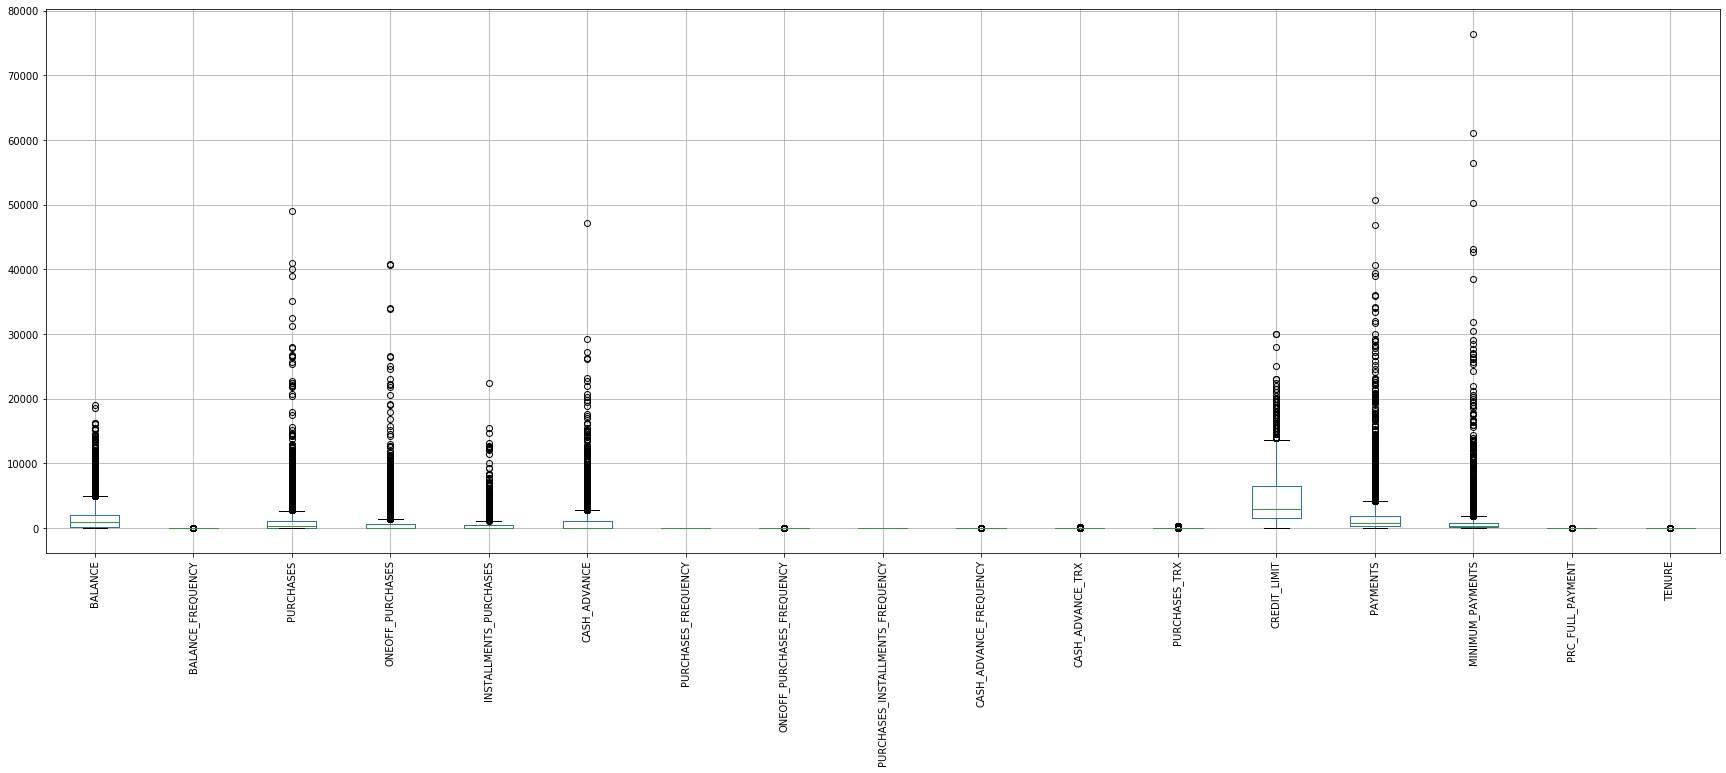

In [24]:
# Creating a boxplot to get a visual of the outliers
credit_df.boxplot(rot=90, figsize=(30,10))

This boxplot shows that I have a lot of extreme outliers in the BALANCE, BALANCE_FREQUENCY, CASH_ADVANCE_FREQUENCY, CASH_ADVANCE_TRX, PAYMENTS, MINIMUM_PAYMENTS, PRC_FULL_PAYMENT, and TENURE columns.  I'm going to use the Log Transformation to try and get rid of some of the variability in the data.

# Log Transformation
I am going to use the Log Transformation here and see how it changes the look of my data.  I will then run my KMeans model on it and see if there is a positive change.

In [25]:
credit_df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
credit_df_log = np.log(1 + credit_df)

credit_df_log.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,6.762968,0.000000,2.564949
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949


It is very clear based on the two outputs above that the data is much less skewed in the log transformation model (especially looking at the balance column).

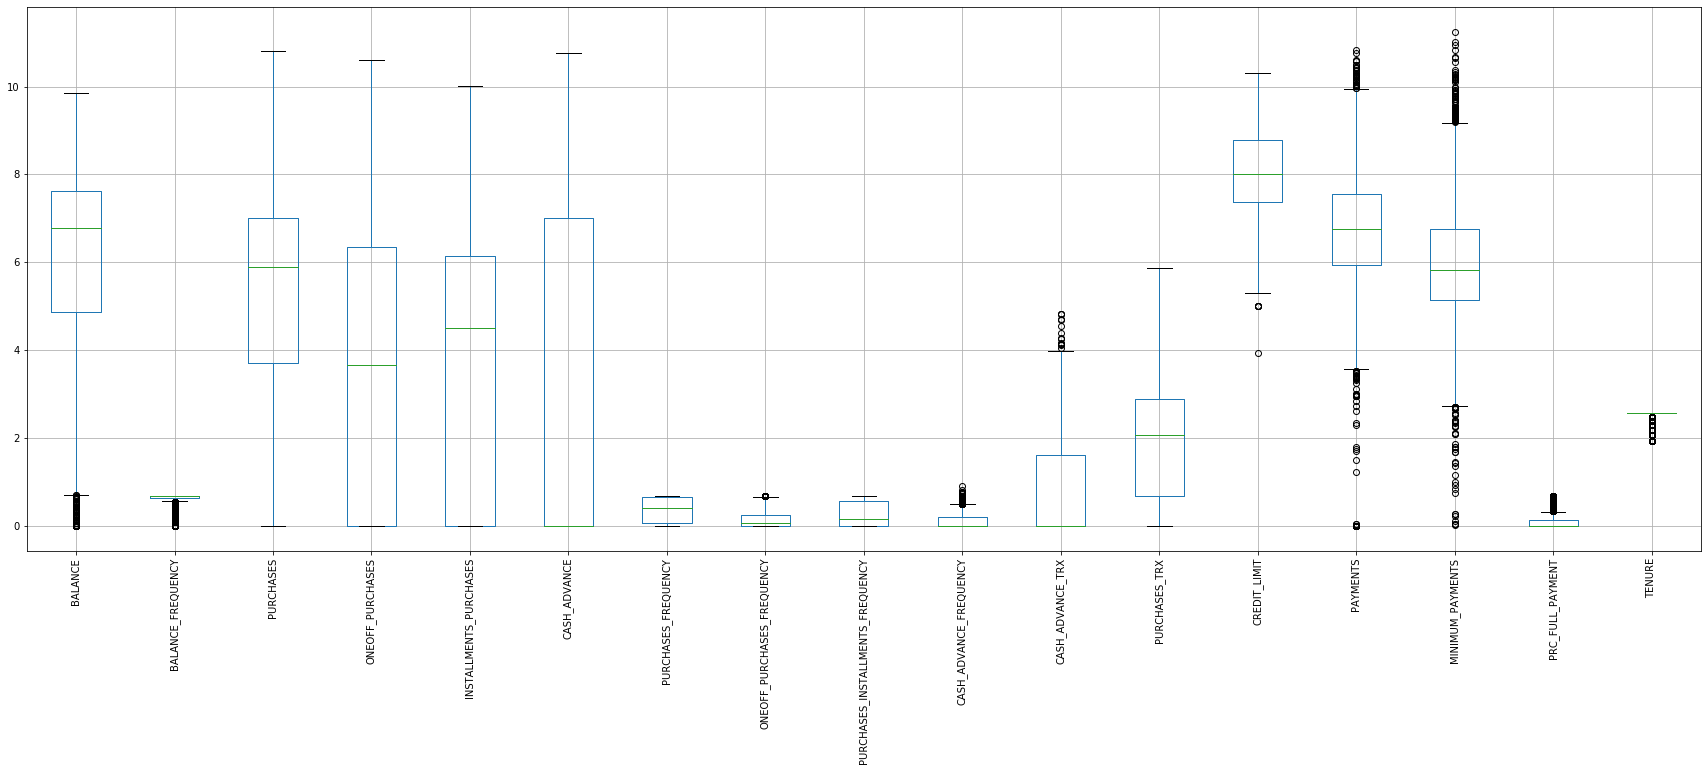

In [27]:
credit_df_log.boxplot(rot=90, figsize=(30,10))

The log transformation generally got rid of the outliers in the columns that were the most extreme but now there are outliers in other columns that didn't have any before.  I'm going to run the KMeans on the log transformed version of my data to see how the models compare.

103 ms ± 54.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


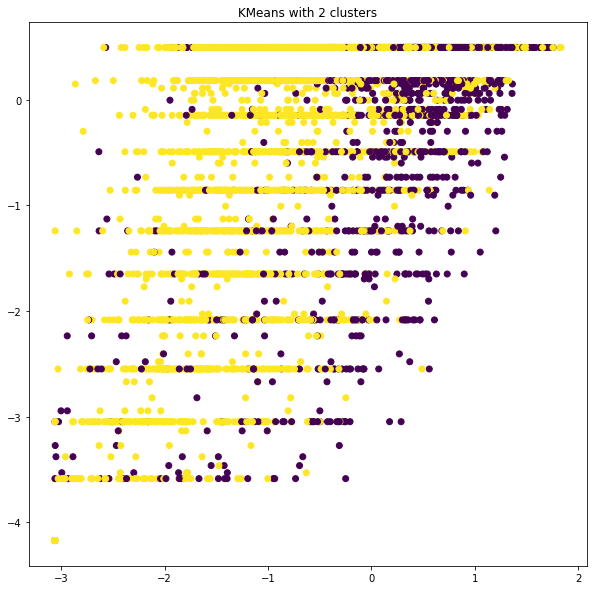

149 ms ± 688 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


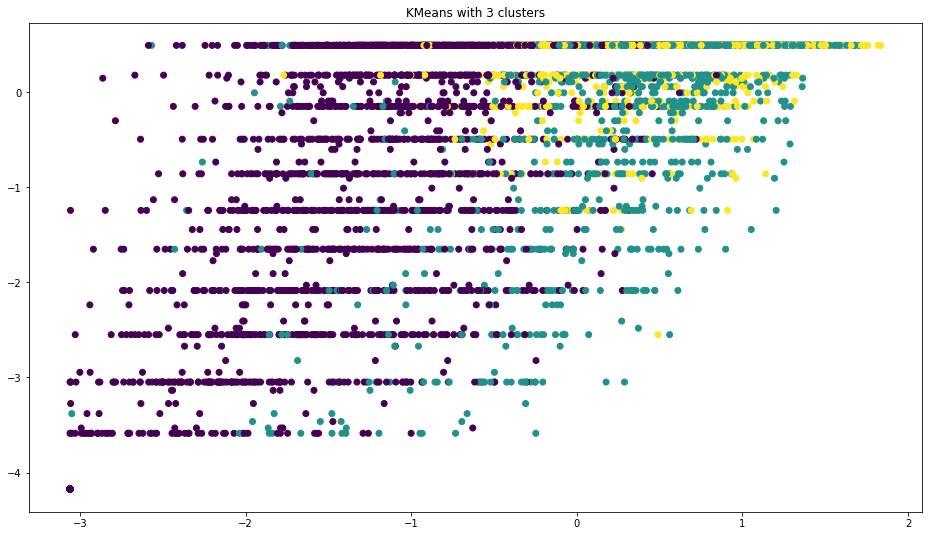

210 ms ± 319 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


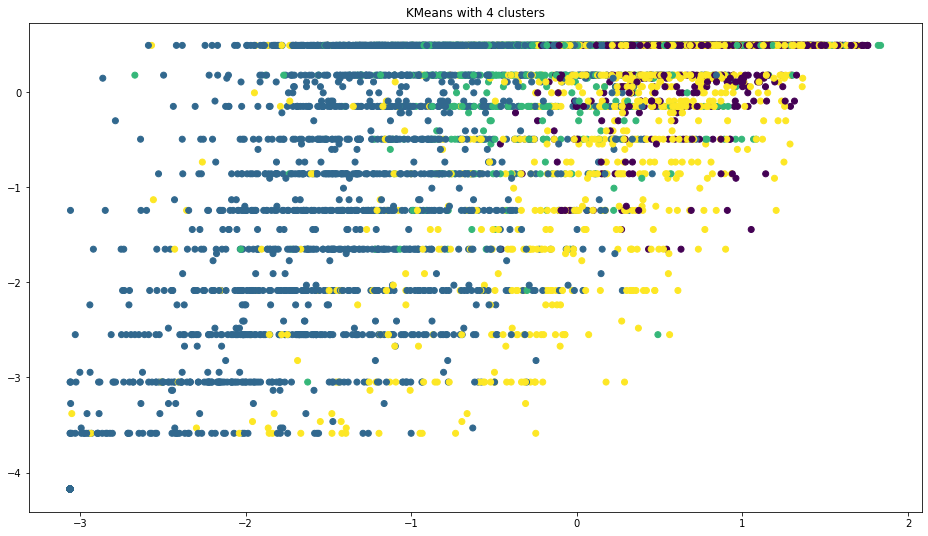

261 ms ± 2.58 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


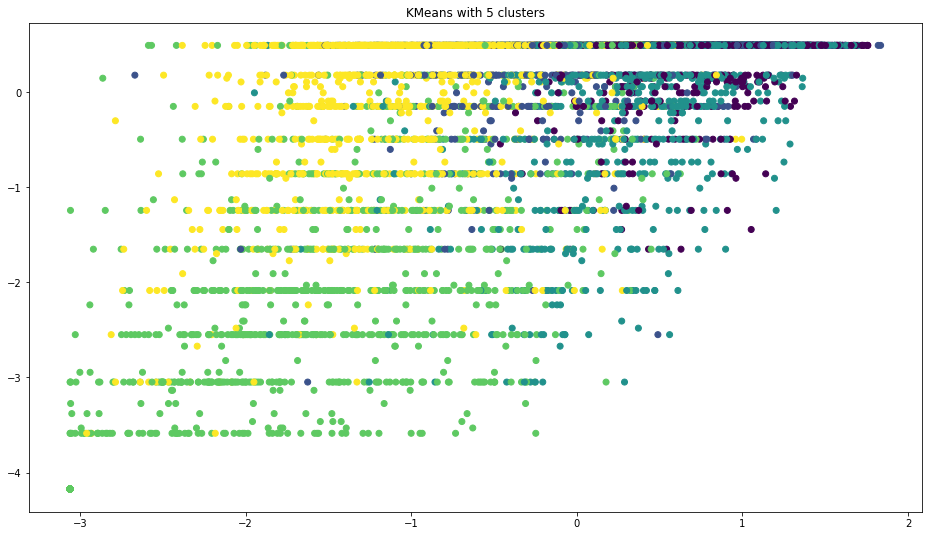

In [28]:
# I'm going to try KMeans using my Log Transformation Data
# I'm splitting my dataframe into X and Y here
X = credit_df_log.iloc[:, :-1]
y = credit_df_log.iloc[:, -1]

# I'm going to standardize my data here
X_std = StandardScaler().fit_transform(X)

# I'm going to use PCA to limit the number of components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)


# KMeans with 2 clusters
k_means = KMeans(n_clusters=2, random_state=16)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.title('KMeans with 2 clusters')
plt.show()

# KMeans with 3 clusters
k_means = KMeans(n_clusters=3, random_state=16)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.rcParams["figure.figsize"] = [16,9]
plt.title('KMeans with 3 clusters')
plt.show()

# KMeans with 4 clusters
k_means = KMeans(n_clusters=4, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.title('KMeans with 4 clusters')
plt.show()

# KMeans with 5 clusters
k_means = KMeans(n_clusters=5, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.title('KMeans with 5 clusters')
plt.show()

In [29]:
# I'm going to check the ARI scores for KMeans
kmeans_pred_2 = KMeans(n_clusters=2, random_state=16).fit_predict(X_std)
kmeans_pred_3 = KMeans(n_clusters=3, random_state=16).fit_predict(X_std)
kmeans_pred_4 = KMeans(n_clusters=4, random_state=16).fit_predict(X_std)
kmeans_pred_5 = KMeans(n_clusters=5, random_state=16).fit_predict(X_std)

print('The ARI score for the 2 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_2)))
print('The ARI score for the 3 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_3)))
print('The ARI score for the 4 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_4)))
print('The ARI score for the 5 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_5)))
print('-------------------------------------------------------------------')

kmeans_pred_2 = KMeans(n_clusters=2, random_state=16).fit_predict(X_pca)
kmeans_pred_3 = KMeans(n_clusters=3, random_state=16).fit_predict(X_pca)
kmeans_pred_4 = KMeans(n_clusters=4, random_state=16).fit_predict(X_pca)
kmeans_pred_5 = KMeans(n_clusters=5, random_state=16).fit_predict(X_pca)

print('The ARI score for the 2 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_2)))
print('The ARI score for the 3 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_3)))
print('The ARI score for the 4 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_4)))
print('The ARI score for the 5 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_5)))

The ARI score for the 2 cluster KMeans is: 0.04527046454921979
The ARI score for the 3 cluster KMeans is: 0.007283989534280334
The ARI score for the 4 cluster KMeans is: -0.002581032434046091
The ARI score for the 5 cluster KMeans is: 0.0009303299661586193
-------------------------------------------------------------------
The ARI score for the 2 cluster KMeans (PCA) is: 0.043498038331623995
The ARI score for the 3 cluster KMeans (PCA) is: 0.00713718758633241
The ARI score for the 4 cluster KMeans (PCA) is: -0.0007885473522265663
The ARI score for the 5 cluster KMeans (PCA) is: -0.0014568393543602255


In [30]:
# Here are the silhouette scores for KMeans
print('The Silhouette score for the 2 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_std, kmeans_pred_2, metric='euclidean')))
print('The Silhouette score for the 3 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_std, kmeans_pred_3, metric='euclidean')))
print('The Silhouette score for the 4 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_std, kmeans_pred_4, metric='euclidean')))
print('The Silhouette score for the 5 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_std, kmeans_pred_5, metric='euclidean')))
print('-------------------------------------------------------------------')

# Here are the silhouette scores for KMeans
print('The Silhouette score for the 2 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_2, metric='euclidean')))
print('The Silhouette score for the 3 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_3, metric='euclidean')))
print('The Silhouette score for the 4 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_4, metric='euclidean')))
print('The Silhouette score for the 5 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_5, metric='euclidean')))

The Silhouette score for the 2 cluster KMeans is: 0.2693851507664379
The Silhouette score for the 3 cluster KMeans is: 0.23917505155917945
The Silhouette score for the 4 cluster KMeans is: 0.21572864608094033
The Silhouette score for the 5 cluster KMeans is: 0.20619310031677715
-------------------------------------------------------------------
The Silhouette score for the 2 cluster KMeans (PCA) is: 0.44181296378620843
The Silhouette score for the 3 cluster KMeans (PCA) is: 0.4204849058153558
The Silhouette score for the 4 cluster KMeans (PCA) is: 0.4098612936732001
The Silhouette score for the 5 cluster KMeans (PCA) is: 0.3903637571671215


Everything that I have tried above (the standard KMeans, PCA KMeans, and Log Transformed KMeans) has resulted in very low ARI scores but Silhouette scores that were much higher.  When comparing the log transformed scores to the non-log transformed versions it is clear that they scored much lower overall (not counting the PCA models). I am going to completely remove the outliers based on their z-score.

## Z-Score


In [31]:
# I am going to use the z-score to identify the outliers
z = np.abs(stats.zscore(credit_df))
print(z)

[[0.73198937 0.24943448 0.42489974 ... 0.31096755 0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.08931021 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.10166318 0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.33546549 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.34690648 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.33294642 0.52555097 4.12276757]]


In [32]:
# I chose a threshold of 3 because this seems to be the standard identifier for data.  If a number
# is more than 3 standard deviations away from the mean then it will be considered an outlier
threshold = 3
print(np.where(z > 3))

(array([   6,   19,   20, ..., 8947, 8948, 8949], dtype=int64), array([ 3, 14, 14, ..., 16, 16, 16], dtype=int64))


In [33]:
credit_df_o = credit_df[(z < 3).all(axis=1)]

In [34]:
print(credit_df.shape)
print(credit_df_o.shape)

(8950, 17)
(7434, 17)


With this new dataset I have taken away nearly 1000 columns.  I am going to see how this works with my KMeans compared to the other models I have run.

# KMeans using data with outliers removed

85.1 ms ± 180 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


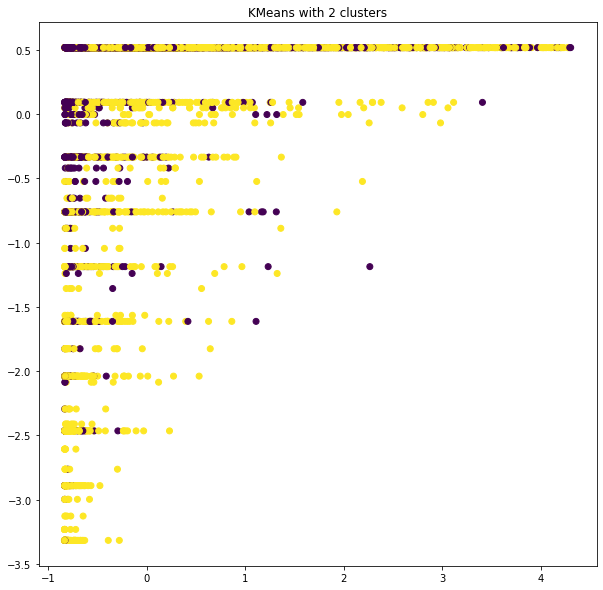

148 ms ± 474 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


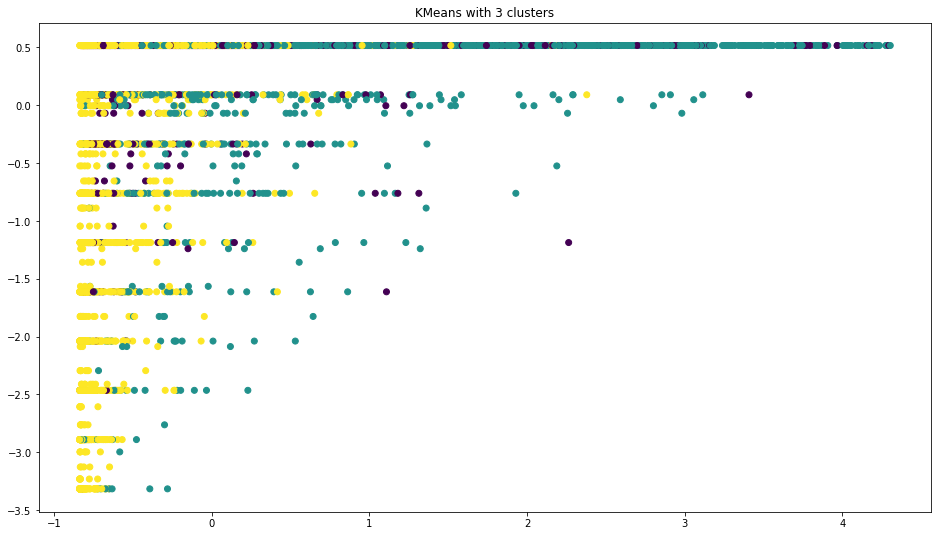

166 ms ± 461 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


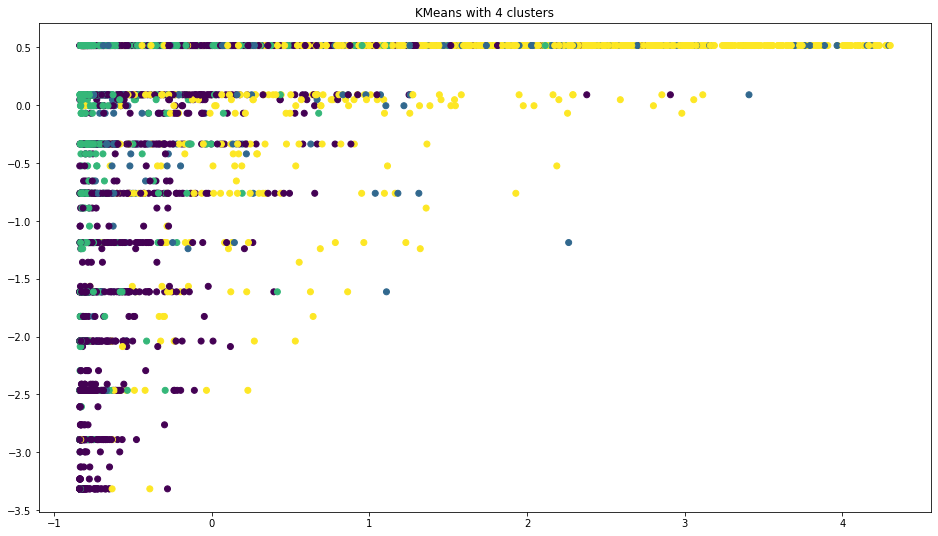

202 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


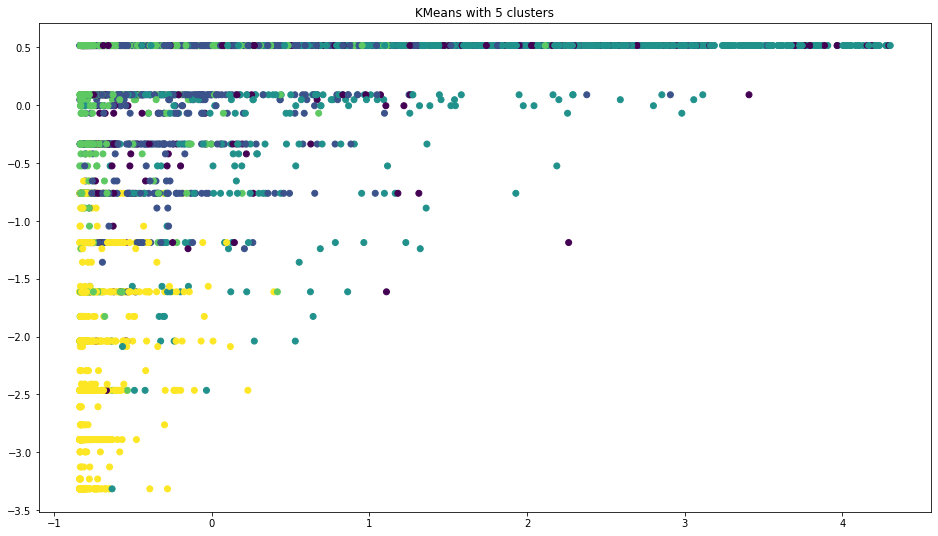

In [35]:
# I'm going to try KMeans using my Log Transformation Data
# I'm splitting my dataframe into X and Y here
X = credit_df_o.iloc[:, :-1]
y = credit_df_o.iloc[:, -1]

# I'm going to standardize my data here
X_std = StandardScaler().fit_transform(X)

# I'm going to use PCA to limit the number of components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)


# KMeans with 2 clusters
k_means = KMeans(n_clusters=2, random_state=16)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.title('KMeans with 2 clusters')
plt.show()

# KMeans with 3 clusters
k_means = KMeans(n_clusters=3, random_state=16)
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.rcParams["figure.figsize"] = [16,9]
plt.title('KMeans with 3 clusters')
plt.show()

# KMeans with 4 clusters
k_means = KMeans(n_clusters=4, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.title('KMeans with 4 clusters')
plt.show()

# KMeans with 5 clusters
k_means = KMeans(n_clusters=5, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_std)
y_pred = k_means.predict(X_std)

# I'm going to plot the solution
plt.scatter(X_std[:,0], X_std[:,1], c=y_pred)
plt.title('KMeans with 5 clusters')
plt.show()

72.1 ms ± 71.3 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


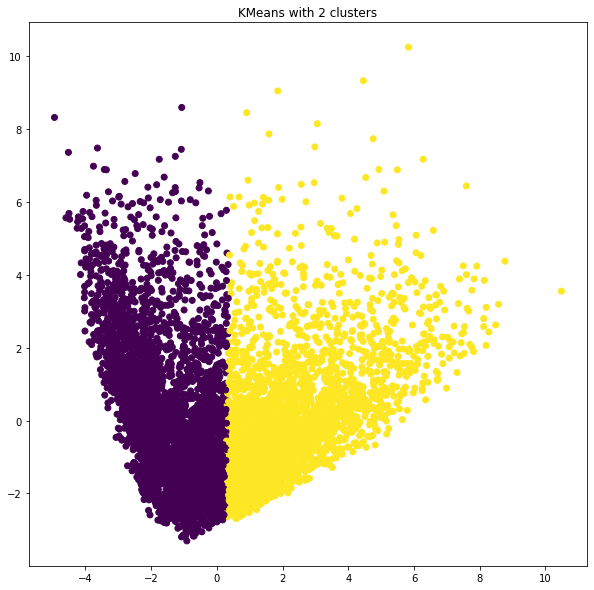

72.3 ms ± 238 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


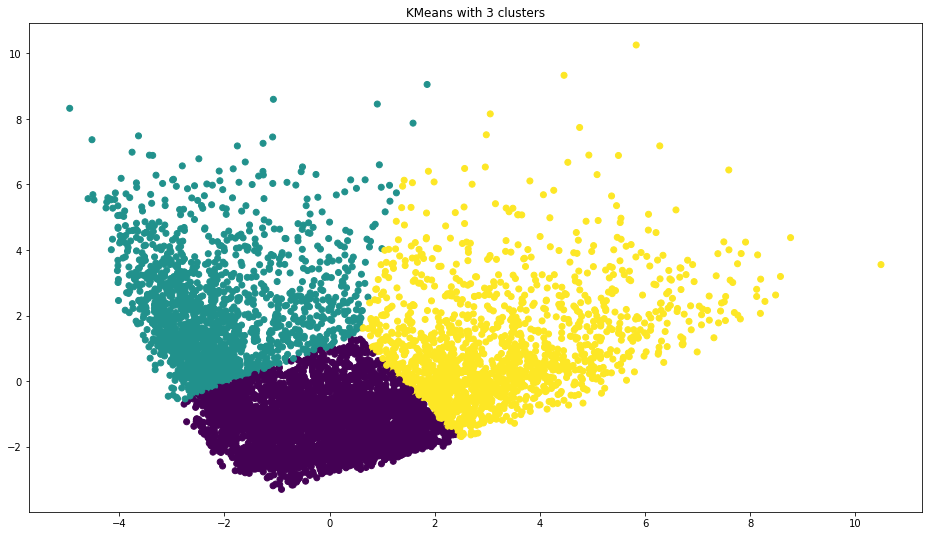

107 ms ± 37.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


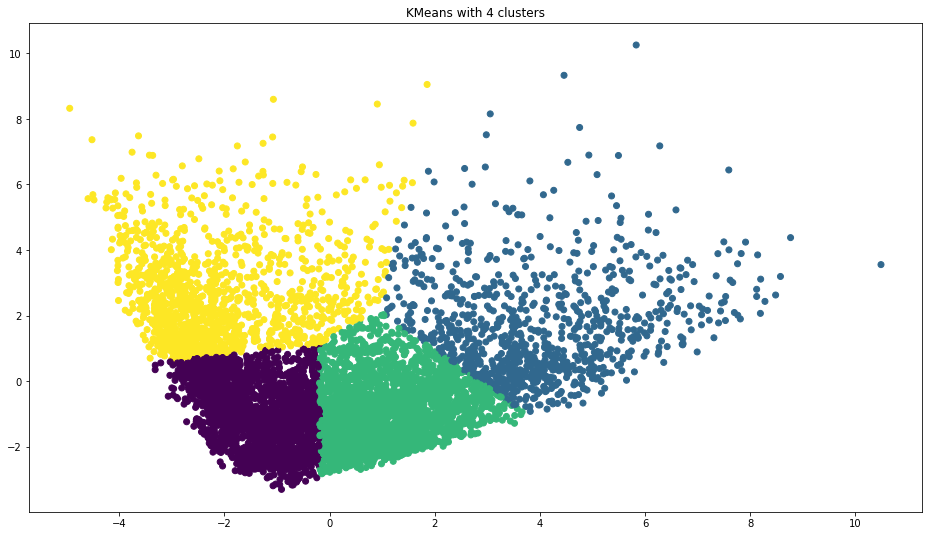

164 ms ± 602 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


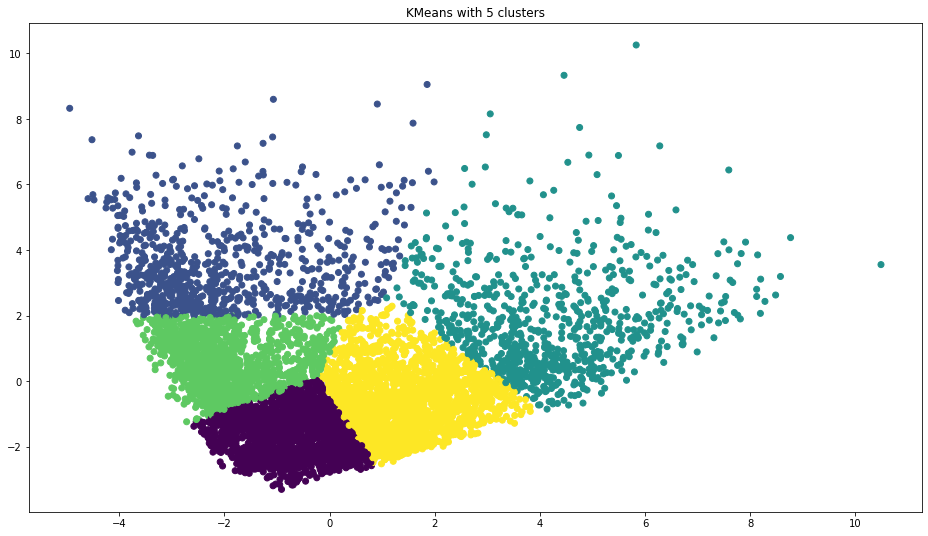

In [36]:
# KMeans with 2 clusters
k_means = KMeans(n_clusters=2, random_state=16)
%timeit k_means.fit(X_pca)
y_pred = k_means.predict(X_pca)

# I'm going to plot the solution
plt.figure(figsize=(10,10))
plt.rcParams["figure.figsize"] = [16,9]
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.title('KMeans with 2 clusters')
plt.show()

# KMeans with 3 clusters
k_means = KMeans(n_clusters=3, random_state=16)
%timeit k_means.fit(X_pca)
y_pred = k_means.predict(X_pca)

# I'm going to plot the solution
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.rcParams["figure.figsize"] = [16,9]
plt.title('KMeans with 3 clusters')
plt.show()

# KMeans with 4 clusters
k_means = KMeans(n_clusters=4, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_pca)
y_pred = k_means.predict(X_pca)

# I'm going to plot the solution
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.title('KMeans with 4 clusters')
plt.show()

# KMeans with 5 clusters
k_means = KMeans(n_clusters=5, random_state=16)
plt.rcParams["figure.figsize"] = [16,9]
%timeit k_means.fit(X_pca)
y_pred = k_means.predict(X_pca)

# I'm going to plot the solution
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_pred)
plt.title('KMeans with 5 clusters')
plt.show()

In [37]:
# I'm going to check the ARI scores for KMeans
kmeans_pred_2 = KMeans(n_clusters=2, random_state=16).fit_predict(X_std)
kmeans_pred_3 = KMeans(n_clusters=3, random_state=16).fit_predict(X_std)
kmeans_pred_4 = KMeans(n_clusters=4, random_state=16).fit_predict(X_std)
kmeans_pred_5 = KMeans(n_clusters=5, random_state=16).fit_predict(X_std)

print('The ARI score for the 2 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_2)))
print('The ARI score for the 3 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_3)))
print('The ARI score for the 4 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_4)))
print('The ARI score for the 5 cluster KMeans is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_5)))
print('-------------------------------------------------------------------')

kmeans_pred_2 = KMeans(n_clusters=2, random_state=16).fit_predict(X_pca)
kmeans_pred_3 = KMeans(n_clusters=3, random_state=16).fit_predict(X_pca)
kmeans_pred_4 = KMeans(n_clusters=4, random_state=16).fit_predict(X_pca)
kmeans_pred_5 = KMeans(n_clusters=5, random_state=16).fit_predict(X_pca)

print('The ARI score for the 2 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_2)))
print('The ARI score for the 3 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_3)))
print('The ARI score for the 4 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_4)))
print('The ARI score for the 5 cluster KMeans (PCA) is: {}'.format(
    metrics.adjusted_rand_score(y, kmeans_pred_5)))

The ARI score for the 2 cluster KMeans is: -0.010984805255941716
The ARI score for the 3 cluster KMeans is: -0.013060412812032728
The ARI score for the 4 cluster KMeans is: -0.006681360688662348
The ARI score for the 5 cluster KMeans is: 0.00024306071592612973
-------------------------------------------------------------------
The ARI score for the 2 cluster KMeans (PCA) is: -0.013639112151463838
The ARI score for the 3 cluster KMeans (PCA) is: -0.013528340251251283
The ARI score for the 4 cluster KMeans (PCA) is: -0.00635603705413905
The ARI score for the 5 cluster KMeans (PCA) is: -0.002277735345024388


In [38]:
# Here are the silhouette scores for KMeans
print('The Silhouette score for the 2 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_std, kmeans_pred_2, metric='euclidean')))
print('The Silhouette score for the 3 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_std, kmeans_pred_3, metric='euclidean')))
print('The Silhouette score for the 4 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_std, kmeans_pred_4, metric='euclidean')))
print('The Silhouette score for the 5 cluster KMeans is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_5, metric='euclidean')))
print('-------------------------------------------------------------------')

# Here are the silhouette scores for KMeans
print('The Silhouette score for the 2 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_2, metric='euclidean')))
print('The Silhouette score for the 3 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_3, metric='euclidean')))
print('The Silhouette score for the 4 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_4, metric='euclidean')))
print('The Silhouette score for the 5 cluster KMeans (PCA) is: {}'.format(
    metrics.silhouette_score(X_pca, kmeans_pred_5, metric='euclidean')))

The Silhouette score for the 2 cluster KMeans is: 0.2170775726697106
The Silhouette score for the 3 cluster KMeans is: 0.21429662579091474
The Silhouette score for the 4 cluster KMeans is: 0.17265392503814728
The Silhouette score for the 5 cluster KMeans is: 0.3634398441272647
-------------------------------------------------------------------
The Silhouette score for the 2 cluster KMeans (PCA) is: 0.37794883696634207
The Silhouette score for the 3 cluster KMeans (PCA) is: 0.41961912504730137
The Silhouette score for the 4 cluster KMeans (PCA) is: 0.3915487769551399
The Silhouette score for the 5 cluster KMeans (PCA) is: 0.3634398441272647


The score with 5 clusters scored the best (which makes sense because that was the optimal number of clusters) but still didn't score higher than my original model.
I am going to run a couple of other models to get an idea of how they compare to my KMeans models.

# Agglomerative Clustering

In [39]:
# Here I am going to make the agglomerative cluster using 2 clusters
# and get the ARI and silhouette scores

agg_cluster = AgglomerativeClustering(linkage='ward',
                                      affinity='euclidean',
                                      n_clusters=2)

# Fitting the model
clusters=agg_cluster.fit_predict(X_std)

In [40]:
# Here I am getting the scores of the model using the 'Ward' linkage
print('The ARI score for Agglomerative Clustering is: {}'.format(
    metrics.adjusted_rand_score(y, clusters)))
print('The silhouette score for Agglomerative Clustering is: {}'.format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The ARI score for Agglomerative Clustering is: -0.04457228043485774
The silhouette score for Agglomerative Clustering is: 0.24552699643681136


# DBSCAN

In [41]:
# I am going to apply DBSCAN to the data
dbscan_cluster = DBSCAN(eps=3, min_samples=1, metric='euclidean')

# Here I will fit the model
clusters = dbscan_cluster.fit_predict(X_std)

In [42]:
# Here I am getting the scores of the model using the 'Ward' linkage
print('The ARI score for DBSCAN Clustering is: {}'.format(
    metrics.adjusted_rand_score(y, clusters)))
print('The silhouette score for DBSCAN Clustering is: {}'.format(
    metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The ARI score for DBSCAN Clustering is: -0.013728129633647656
The silhouette score for DBSCAN Clustering is: 0.09411155068605075


# Conclusion
After trying many different techniques for preparing the data the model that scored the best was the 2 cluster (PCA) model without any of the log transformations or outliers removed.  When not working with PCA and just running the models "as is" then the suggested 5 clusters worked best.  Overall, with more time, I would try using various other methods to work with the large number of outliers and also run other types of models to see if the scores come back any different.

The real world use of this model would be for credit card companies.  If they were trying to find good candidates to open up a new account or to give a cash-advance to this data would help them tremendously.  It can be tweaked to focus on different factors but I chose to focus in on the tenure because this is the one that is simplest to follow (balances can flucuate based on different unforeseen expenses but time is always steady).